<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Final Project
    // Machine Learning for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Final Project: Machine learning\
Last Updated: January 13, 2021\
Author: @pHeesari

## Project Introduction


Basically this project will forecast tomorrow's weather condition in Australia by determining **whether it will be rain or not**. The data is obtianed from this website page: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package . The raw data contain 23 columns consist of weather variables such as air temperature, pressure, humidity, and so on. 

## Library Import

In [1]:
#Import statement for general library. The specific library related to Machine Learning 
#will be added in the related cell

import pandas as pd
import math
import statistics
import numpy as np
import scipy.stats
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime

## Data Loading and Exploratory Data Analysis

This section will load the used data as well as do EDA. 

In [2]:
#Load Dataset
df=pd.read_csv('./weatherAUS.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [3]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
Date             145460 non-null object
Location         145460 non-null object
MinTemp          143975 non-null float64
MaxTemp          144199 non-null float64
Rainfall         142199 non-null float64
Evaporation      82670 non-null float64
Sunshine         75625 non-null float64
WindGustDir      135134 non-null object
WindGustSpeed    135197 non-null float64
WindDir9am       134894 non-null object
WindDir3pm       141232 non-null object
WindSpeed9am     143693 non-null float64
WindSpeed3pm     142398 non-null float64
Humidity9am      142806 non-null float64
Humidity3pm      140953 non-null float64
Pressure9am      130395 non-null float64
Pressure3pm      130432 non-null float64
Cloud9am         89572 non-null float64
Cloud3pm         86102 non-null float64
Temp9am          143693 non-null float64
Temp3pm          141851 non-null float64
RainToday        142199 non-null obje

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
np.shape(df)

(145460, 23)

In [7]:
see_cat=['Location','WindGustDir','WindDir9am',
         'WindDir3pm','RainToday','RainTomorrow']
for x in see_cat:
    print(df[x].value_counts(),'\n')

Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Perth               3193
Adelaide            3193
Brisbane            3193
Hobart              3193
Albany              3040
MountGambier        3040
Townsville          3040
Wollongong          3040
Ballarat            3040
Albury              3040
MountGinini         3040
Bendigo             3040
GoldCoast           3040
AliceSprings        3040
Cairns              3040
Launceston          3040
Penrith             3039
Newcastle           3039
Tuggeranong         3039
WaggaWagga          3009
Sale                3009
MelbourneAirport    3009
SydneyAirport       3009
Dartmoor            3009
BadgerysCreek       3009
Richmond            3009
Watsonia            3009
PerthAirport        3009
Williamtown         3009
Portland            3009
Witchcliffe         3009
Moree               3009
PearceRAAF          3009
Nuriootpa           3009
Woomera             3009
NorfolkIsland       3009


In [8]:
data=df.copy()
data.dropna(inplace=True)
data

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
142299,2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
142300,2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No
142301,2017-06-23,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,...,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No


In [9]:
np.shape(data)

(56420, 23)

In [10]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000,56420.000000
mean,13.464770,24.219206,2.130397,5.503135,7.735626,40.877366,15.667228,19.786778,65.874123,49.601985,1017.239505,1014.795580,4.241705,4.326515,18.204961,22.710333
std,6.416689,6.970676,7.014822,3.696282,3.758153,13.335232,8.317005,8.510180,18.513289,20.197040,6.909357,6.870892,2.797162,2.647251,6.567991,6.836543
min,-6.700000,4.100000,0.000000,0.000000,0.000000,9.000000,2.000000,2.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-0.700000,3.700000
25%,8.600000,18.700000,0.000000,2.800000,5.000000,31.000000,9.000000,13.000000,55.000000,35.000000,1012.700000,1010.100000,1.000000,2.000000,13.100000,17.400000
50%,13.200000,23.900000,0.000000,5.000000,8.600000,39.000000,15.000000,19.000000,67.000000,50.000000,1017.200000,1014.700000,5.000000,5.000000,17.800000,22.400000
75%,18.400000,29.700000,0.600000,7.400000,10.700000,48.000000,20.000000,26.000000,79.000000,63.000000,1021.800000,1019.400000,7.000000,7.000000,23.300000,27.900000
max,31.400000,48.100000,206.200000,81.200000,14.500000,124.000000,67.000000,76.000000,100.000000,100.000000,1040.400000,1038.900000,8.000000,9.000000,39.400000,46.100000


In [11]:
for x in see_cat:
    print(data[x].value_counts(),'\n')

Darwin              3062
Perth               3025
Brisbane            2953
MelbourneAirport    2929
PerthAirport        2913
SydneyAirport       2870
Watsonia            2730
Mildura             2594
MountGambier        2465
NorfolkIsland       2464
Cairns              2444
Townsville          2419
WaggaWagga          2416
AliceSprings        2223
Nuriootpa           2008
Hobart              1939
Moree               1913
Melbourne           1898
Portland            1863
Woomera             1734
Sydney              1690
Sale                1678
CoffsHarbour        1380
Williamtown         1198
Canberra            1078
Cobar                534
Name: Location, dtype: int64 

E      4516
N      4210
W      4161
SW     4052
ENE    4028
SE     3930
SSW    3898
WSW    3791
S      3636
ESE    3312
SSE    3295
NE     3185
WNW    2989
NW     2612
NNE    2516
NNW    2289
Name: WindGustDir, dtype: int64 

N      4967
E      4456
ENE    3932
SSE    3893
SE     3880
W      3707
S      3421
ESE    34

As the data displays many cities in the Ausie, I just try to select 5 cities with the highest number of data after fiterling out the nan value. 

In [12]:
data.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
6055,2009-01-07,Cobar,27.1,36.1,0.0,13.0,0.0,N,43.0,N,...,26.0,19.0,1007.7,1007.4,8.0,8.0,30.7,34.3,No,No
6056,2009-01-08,Cobar,23.3,34.0,0.0,9.8,12.6,SSW,41.0,S,...,33.0,15.0,1011.3,1009.9,3.0,1.0,25.0,31.5,No,No
6057,2009-01-09,Cobar,16.1,34.2,0.0,14.6,13.2,SE,37.0,SE,...,25.0,9.0,1013.3,1009.2,1.0,1.0,20.7,32.8,No,No
6058,2009-01-10,Cobar,19.0,35.5,0.0,12.0,12.3,ENE,48.0,ENE,...,46.0,28.0,1008.3,1004.0,1.0,5.0,23.4,33.3,No,No
6059,2009-01-11,Cobar,19.7,35.5,0.0,11.0,12.7,NE,41.0,NNE,...,61.0,14.0,1007.9,1005.8,1.0,5.0,24.0,33.6,No,No


In [13]:
data.set_index('Location')

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Location,,,,,,,,,,,,,,,,,,,,,
Cobar,2009-01-01,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
Cobar,2009-01-02,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
Cobar,2009-01-04,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
Cobar,2009-01-05,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
Cobar,2009-01-06,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Darwin,2017-06-20,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
Darwin,2017-06-21,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
Darwin,2017-06-22,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No


In [14]:
data['Datetime']=pd.to_datetime(df['Date'])

In [15]:
data.drop(['Date'],axis=1,inplace=True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
Location         56420 non-null object
MinTemp          56420 non-null float64
MaxTemp          56420 non-null float64
Rainfall         56420 non-null float64
Evaporation      56420 non-null float64
Sunshine         56420 non-null float64
WindGustDir      56420 non-null object
WindGustSpeed    56420 non-null float64
WindDir9am       56420 non-null object
WindDir3pm       56420 non-null object
WindSpeed9am     56420 non-null float64
WindSpeed3pm     56420 non-null float64
Humidity9am      56420 non-null float64
Humidity3pm      56420 non-null float64
Pressure9am      56420 non-null float64
Pressure3pm      56420 non-null float64
Cloud9am         56420 non-null float64
Cloud3pm         56420 non-null float64
Temp9am          56420 non-null float64
Temp3pm          56420 non-null float64
RainToday        56420 non-null object
RainTomorrow     56420 non-null object
Datetime     

In [17]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Datetime
6049,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No,2009-01-01
6050,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No,2009-01-02
6052,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No,2009-01-04
6053,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No,2009-01-05
6054,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No,2009-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No,2017-06-20
142299,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No,2017-06-21
142300,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No,2017-06-22
142301,Darwin,19.5,31.8,0.0,6.2,10.6,ESE,26.0,SE,NNW,...,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,No,No,2017-06-23


In [18]:
data = data.set_index('Datetime')

In [19]:
data

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,SW,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,NNW,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,WSW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,WNW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No


In [20]:
sort_city = data.loc[data['Location'].isin(['Darwin','Perth','Brisbane','MelbourneAirport','PerthAirport'])]
sort_city

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
Datetime,,,,,,,,,,,,,,,,,,,,,
2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,SW,...,55.0,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes
2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,SSE,...,50.0,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No
2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,S,...,51.0,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No
2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,SSE,...,67.0,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No
2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,SSE,...,51.0,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,ENE,35.0,SE,NE,...,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,No,No
2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,E,37.0,SE,SE,...,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,No,No
2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,E,33.0,E,W,...,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,No,No


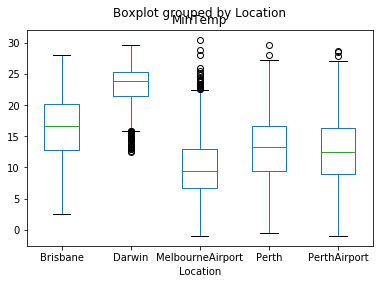

In [21]:
sort_city.boxplot(by ='Location', column =['MinTemp'], grid = False) 

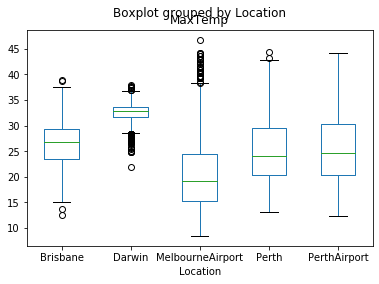

In [22]:
sort_city.boxplot(by ='Location', column =['MaxTemp'], grid = False) 

From Minimum and Maximum Temperature variables, it can be seen that Darwin has the highest temperature, this can be assumed that among five selected cities, Darwin is the only city which is located in northern part of the country. So it is more influenced by tropical region which is hotter than the sourthern part of the country. 

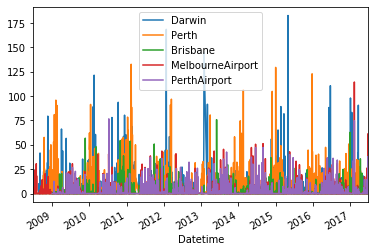

In [23]:
ax = plt.subplot(111)
sort_city[sort_city.Location.isin(['Darwin','Perth',
                                   'Brisbane','MelbourneAirport','PerthAirport'])].groupby('Location').plot(y='Rainfall', kind='line',ax=ax)
L = plt.legend()
_ = [plt.setp(item, 'text', T) for item, T in zip(L.texts, ['Darwin','Perth',
                                   'Brisbane','MelbourneAirport','PerthAirport'])]

# Machine Learning - Raw Feature Selection

This part is preparation of the machine learning. It consists of data encoding, train and test data division, and so on. 

In [24]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

le = LabelEncoder()

In [25]:
#Encoder categorial value 

target = le.fit_transform(sort_city['RainTomorrow'])
print("class before encoder: ",sort_city['RainTomorrow'])
print("class after encoder: ",target)
print('class before transform: ',le.classes_)

class before encoder:  Datetime
2009-01-01    Yes
2009-01-02     No
2009-01-03     No
2009-01-04     No
2009-01-05     No
             ... 
2017-06-20     No
2017-06-21     No
2017-06-22     No
2017-06-23     No
2017-06-24     No
Name: RainTomorrow, Length: 14882, dtype: object
class after encoder:  [1 0 0 ... 0 0 0]
class before transform:  ['No' 'Yes']


In [26]:
rain_today_en = le.fit_transform(sort_city['RainToday'])
wind_gust_dir_en = le.fit_transform(sort_city['WindGustDir'])
wind_dir9am_en = le.fit_transform(sort_city['WindDir9am'])
wind_dir3pm_en = le.fit_transform(sort_city['WindDir3pm'])

In [27]:
#Stack into the dataframe
sort_city['target_label_encode'] = target 
sort_city['rain_today_encode'] = rain_today_en
sort_city['wind_gust_encode'] = wind_gust_dir_en
sort_city['wind_dir9am_encode'] = wind_dir9am_en
sort_city['wind_dir3pm_encode'] = wind_dir3pm_en

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [28]:
sort_city.columns.values

array(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'target_label_encode', 'rain_today_encode', 'wind_gust_encode',
       'wind_dir9am_encode', 'wind_dir3pm_encode'], dtype=object)

**Darwin is the one and only city in the five highest data number which has different weather condition among the 5 highest city**, so I try to build model based only weather data from this city. 

In [29]:
Darwin = sort_city.loc[sort_city['Location'] == 'Darwin']
np.shape(Darwin)

(3062, 27)

In [30]:
features_data_satu = Darwin[['MinTemp','MaxTemp','Rainfall',
                           'Evaporation','Sunshine','WindGustSpeed',
                           'WindSpeed9am','Humidity9am','Humidity3pm', 
                           'Pressure9am', 'Pressure3pm', 'Cloud9am',
                           'Cloud3pm', 'Temp9am','Temp3pm',]].values
target_data = Darwin[['target_label_encode']].values.reshape(-1,1)

In [31]:
x_train,x_test,y_train,y_test = train_test_split(features_data_satu,target_data,test_size=0.25)
y_test = y_test.reshape(len(y_test))
y_train = y_train.reshape(len(y_train))
print('shape feature total: ',features_data_satu.shape)
print('shape feature train: ',x_train.shape)
print('shape feature test: ',x_test.shape)
print('shape target test: ',y_test.shape)

shape feature total:  (3062, 15)
shape feature train:  (2296, 15)
shape feature test:  (766, 15)
shape target test:  (766,)


### KNN Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

mod_KNN = KNeighborsClassifier(n_neighbors=5)
mod_KNN.fit(x_train,y_train)
y_pred_KNN = mod_KNN.predict(x_test)
print("Accuracy Model KNN:",metrics.accuracy_score(y_test,y_pred_KNN))

Accuracy Model KNN: 0.8420365535248042


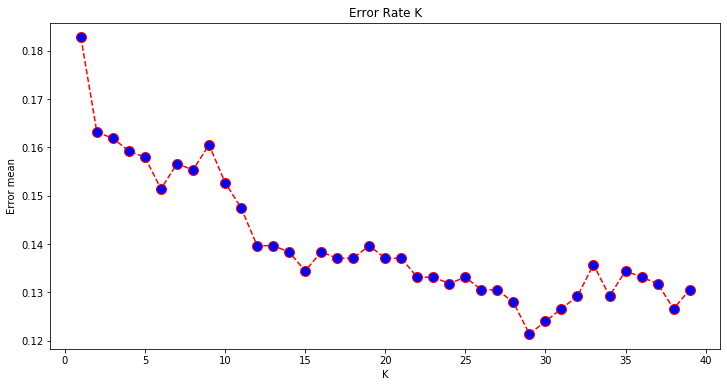

In [33]:
#Find the optimum K

error = []

#Calculating error for K value between 1 and 40
for i in range (1,40):
    mod_KNN = KNeighborsClassifier(n_neighbors=i)
    mod_KNN.fit(x_train,y_train)
    y_pred_KNN_i = mod_KNN.predict(x_test)
    error.append(np.mean(y_pred_KNN_i != y_test))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',
        marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K')
plt.xlabel ('K')
plt.ylabel('Error mean')
plt.show()

In [34]:
#Best model with optimum K =29
mod_KNN = KNeighborsClassifier(n_neighbors=29)
mod_KNN.fit(x_train,y_train)
y_pred_KNN = mod_KNN.predict(x_test)
print("Accuracy Model KNN:",metrics.accuracy_score(y_test,y_pred_KNN))

Accuracy Model KNN: 0.8785900783289817


In [35]:
cm_KNN = confusion_matrix(y_test,y_pred_KNN)
cm_KNN

array([[531,  38],
       [ 55, 142]])

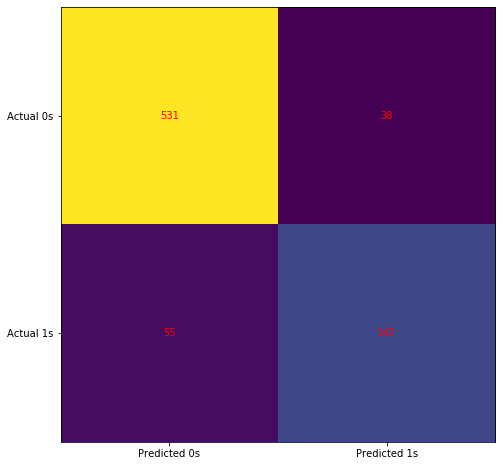

In [36]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_KNN)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_KNN[i,j], ha='center', va='center', color = 'red')
plt.show()

### Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

mod_log = LogisticRegression(solver='liblinear',C=0.05,multi_class='ovr',
                            random_state=0)
mod_log.fit(x_train,y_train)
y_pred_log = mod_log.predict(x_test)
mod_log.score(x_train,y_train)

0.8693379790940766

In [38]:
mod_log.score(x_test,y_test)

0.8642297650130548

In [39]:
cm_log = confusion_matrix(y_test,y_pred_log)
cm_log

array([[521,  48],
       [ 56, 141]])

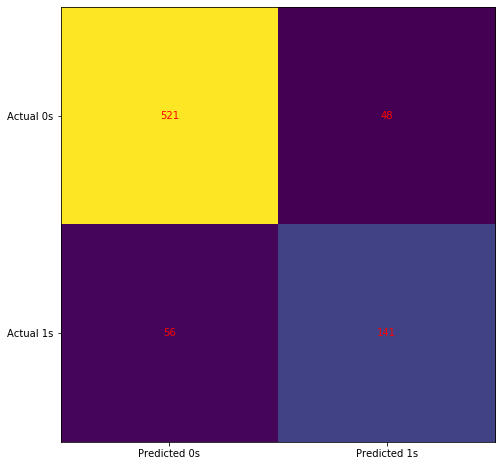

In [40]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_log)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_log[i,j], ha='center', va='center', color = 'red')
plt.show()

In [41]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       569
           1       0.75      0.72      0.73       197

    accuracy                           0.86       766
   macro avg       0.82      0.82      0.82       766
weighted avg       0.86      0.86      0.86       766



### Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB

mod_bay = GaussianNB().fit(x_train,y_train)
y_pred_bay = mod_bay.predict(x_test)
mod_bay.score(x_train,y_train)

0.8344947735191638

In [43]:
mod_bay.score(x_test,y_test)

0.8172323759791122

In [44]:
cm_bay = confusion_matrix(y_test,y_pred_bay)
cm_bay

array([[467, 102],
       [ 38, 159]])

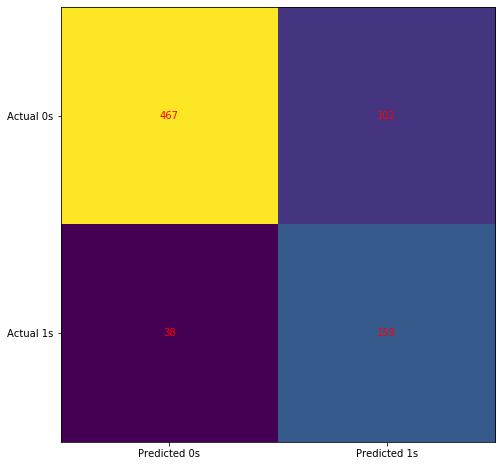

In [45]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_bay)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_bay[i,j], ha='center', va='center', color = 'red')
plt.show()

### Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
mod_clf = clf.fit(x_train,y_train)
y_pred_clf = clf.predict(x_test)
print("Accuracy Decision Tree:",metrics.accuracy_score(y_test,y_pred_clf))

Accuracy Decision Tree: 0.8002610966057441


In [47]:
cm_clf = confusion_matrix(y_test,y_pred_clf)
cm_clf

array([[483,  86],
       [ 67, 130]])

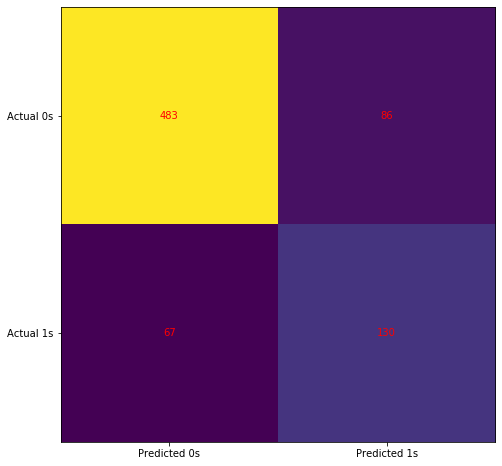

In [48]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_clf)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_clf[i,j], ha='center', va='center', color = 'red')
plt.show()

### Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier(n_estimators=100)
mod_rfs = rfs.fit(x_train,y_train)
y_pred_rfs = rfs.predict(x_test)
print("Accuracy Random Forest:",metrics.accuracy_score(y_test,y_pred_rfs))

Accuracy Random Forest: 0.8590078328981723


In [50]:
cm_rfs = confusion_matrix(y_test,y_pred_rfs)
cm_rfs

array([[522,  47],
       [ 61, 136]])

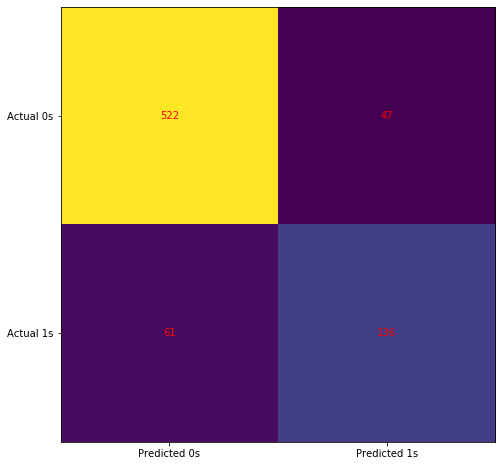

In [51]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_rfs)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_rfs[i,j], ha='center', va='center', color = 'red')
plt.show()

### SVM

In [52]:
from sklearn import svm

sup = svm.SVC(kernel='linear')
mod_sup = sup.fit(x_train,y_train)
y_pred_sup = sup.predict(x_test)
print("Accuracy SVM:",metrics.accuracy_score(y_test,y_pred_sup))

Accuracy SVM: 0.8590078328981723


In [53]:
cm_sup = confusion_matrix(y_test,y_pred_sup)
cm_sup

array([[521,  48],
       [ 60, 137]])

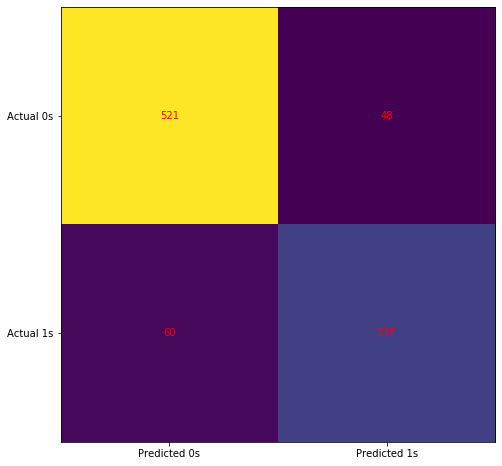

In [54]:
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm_sup)
ax.grid(False)
ax.xaxis.set(ticks=(0,1),ticklabels=('Predicted 0s','Predicted 1s'))
ax.yaxis.set(ticks=(0,1),ticklabels=('Actual 0s','Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j,i, cm_sup[i,j], ha='center', va='center', color = 'red')
plt.show()

## Machine Learning with all features data


In [55]:
features_data = Darwin[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                        'Sunshine', 'WindGustSpeed','WindSpeed9am',
                        'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm',
                        'Cloud9am','Cloud3pm', 'Temp9am', 'Temp3pm','rain_today_encode', 
                        'wind_gust_encode','wind_dir9am_encode', 'wind_dir3pm_encode']].values
target_data = Darwin[['target_label_encode']].values.reshape(-1,1)

In [56]:
x_train_all,x_test_all,y_train_all,y_test_all = train_test_split(features_data,target_data,test_size=0.25)
y_test_all = y_test_all.reshape(len(y_test_all))
y_train_all = y_train_all.reshape(len(y_train_all))
print('shape feature total all: ',features_data.shape)
print('shape feature train all: ',x_train_all.shape)
print('shape feature test all: ',x_test_all.shape)
print('shape target test all: ',y_test_all.shape)

print('shape feature total integer only: ',features_data_satu.shape)
print('shape feature train integer only: ',x_train.shape)
print('shape feature test integer only: ',x_test.shape)
print('shape target testinteger only: ',y_test.shape)

shape feature total all:  (3062, 20)
shape feature train all:  (2296, 20)
shape feature test all:  (766, 20)
shape target test all:  (766,)
shape feature total integer only:  (3062, 15)
shape feature train integer only:  (2296, 15)
shape feature test integer only:  (766, 15)
shape target testinteger only:  (766,)


### KNN

In [57]:
mod_KNN_all = KNeighborsClassifier(n_neighbors=5)
mod_KNN_all.fit(x_train_all,y_train_all)
y_pred_KNN_all = mod_KNN_all.predict(x_test_all)
print("Accuracy Model KNN:",metrics.accuracy_score(y_test_all,y_pred_KNN_all))

Accuracy Model KNN: 0.8289817232375979


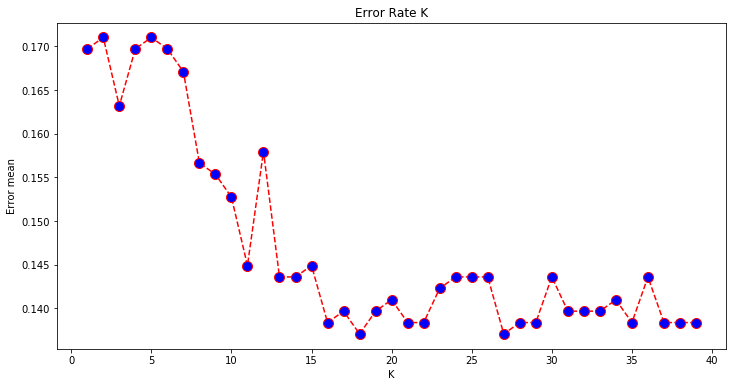

In [58]:
#Find the optimum K

error = []

#Calculating error for K value between 1 and 40
for i in range (1,40):
    mod_KNN_all = KNeighborsClassifier(n_neighbors=i)
    mod_KNN_all.fit(x_train_all,y_train_all)
    y_pred_KNN_all_i = mod_KNN_all.predict(x_test_all)
    error.append(np.mean(y_pred_KNN_all_i != y_test_all))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',
        marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K')
plt.xlabel ('K')
plt.ylabel('Error mean')
plt.show()

In [59]:
#Best model with optimum K =7
mod_KNN_all = KNeighborsClassifier(n_neighbors=7)
mod_KNN_all.fit(x_train_all,y_train_all)
y_pred_KNN_all = mod_KNN_all.predict(x_test_all)
print("Accuracy Model KNN_all:",metrics.accuracy_score(y_test_all,y_pred_KNN_all))

Accuracy Model KNN_all: 0.8328981723237598


In [60]:
cm_KNN_all = confusion_matrix(y_test_all,y_pred_KNN_all)
cm_KNN_all

array([[512,  56],
       [ 72, 126]])

### Logistic Regression

In [61]:
mod_log_all = LogisticRegression(solver='liblinear',C=0.05,multi_class='ovr',
                            random_state=0)
mod_log_all.fit(x_train_all,y_train_all)
y_pred_log_all = mod_log_all.predict(x_test_all)
mod_log_all.score(x_train_all,y_train_all)
print("Accuracy model Logistic Regression All:",
      metrics.accuracy_score(y_test_all,y_pred_log_all))

Accuracy model Logistic Regression All: 0.8681462140992167


In [62]:
cm_log_all = confusion_matrix(y_test_all,y_pred_log_all)
cm_log_all

array([[525,  43],
       [ 58, 140]])

### Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB

mod_bay_all = GaussianNB().fit(x_train_all,y_train_all)
y_pred_bay_all = mod_bay_all.predict(x_test_all)
mod_bay_all.score(x_train_all,y_train_all)
print("Accuracy model Naive Bayes:",metrics.accuracy_score(y_test_all,y_pred_bay_all))

Accuracy model Naive Bayes: 0.8381201044386423


In [64]:
cm_bay_all = confusion_matrix(y_test_all,y_pred_bay_all)
cm_bay_all

array([[476,  92],
       [ 32, 166]])

### Decision Tree


In [65]:
clf_all = DecisionTreeClassifier()
mod_clf_all = clf_all.fit(x_train_all,y_train_all)
y_pred_clf_all = clf_all.predict(x_test_all)
print("Accuracy Decision Tree:",metrics.accuracy_score(y_test_all,y_pred_clf_all))

Accuracy Decision Tree: 0.8185378590078329


In [66]:
cm_clf_all = confusion_matrix(y_test_all,y_pred_clf_all)
cm_clf_all

array([[504,  64],
       [ 75, 123]])

### Random Forest

In [67]:
rfs_all = RandomForestClassifier(n_estimators=100)
mod_rfs_all = rfs_all.fit(x_train_all,y_train_all)
y_pred_rfs_all = rfs_all.predict(x_test_all)
print("Accuracy Random Forest:",metrics.accuracy_score(y_test_all,y_pred_rfs_all))

Accuracy Random Forest: 0.856396866840731


In [68]:
cm_rfs_all = confusion_matrix(y_test_all,y_pred_rfs_all)
cm_rfs_all

array([[524,  44],
       [ 66, 132]])

### SVM 

In [69]:
sup_all = svm.SVC(kernel='linear')
mod_sup_all = sup_all.fit(x_train_all,y_train_all)
y_pred_sup_all = sup_all.predict(x_test_all)
print("Accuracy SVM:",metrics.accuracy_score(y_test_all,y_pred_sup_all))

Accuracy SVM: 0.8681462140992167


In [70]:
cm_sup_all = confusion_matrix(y_test_all,y_pred_sup_all)
cm_sup_all

array([[530,  38],
       [ 63, 135]])

## Comparison between features selection 

### (integer only and all features included)

In [71]:
print("Accuracy Model KNN Integer Only:",metrics.accuracy_score(y_test,y_pred_KNN))
print("Accuracy Model KNN All:",metrics.accuracy_score(y_test_all,y_pred_KNN_all))
print("Accuracy model Logistic Regression Integer Only:",metrics.accuracy_score(y_test,y_pred_log))
print("Accuracy model Logistic Regression All:",metrics.accuracy_score(y_test_all,y_pred_log_all))
print("Accuracy model Naive Bayes Integer Only:",metrics.accuracy_score(y_test,y_pred_bay))
print("Accuracy model Naive Bayes All:",metrics.accuracy_score(y_test_all,y_pred_bay_all))
print("Accuracy model Decision Tree Integer Only:",metrics.accuracy_score(y_test,y_pred_clf))
print("Accuracy model Decision Tree All:",metrics.accuracy_score(y_test_all,y_pred_clf_all))
print("Accuracy model Random Forest Integer Only:",metrics.accuracy_score(y_test,y_pred_rfs))
print("Accuracy model Random Forest All:",metrics.accuracy_score(y_test_all,y_pred_rfs_all))
print("Accuracy model SVM Integer Only:",metrics.accuracy_score(y_test,y_pred_sup))
print("Accuracy model SVM All:",metrics.accuracy_score(y_test_all,y_pred_sup_all))

Accuracy Model KNN Integer Only: 0.8785900783289817
Accuracy Model KNN All: 0.8328981723237598
Accuracy model Logistic Regression Integer Only: 0.8642297650130548
Accuracy model Logistic Regression All: 0.8681462140992167
Accuracy model Naive Bayes Integer Only: 0.8172323759791122
Accuracy model Naive Bayes All: 0.8381201044386423
Accuracy model Decision Tree Integer Only: 0.8002610966057441
Accuracy model Decision Tree All: 0.8185378590078329
Accuracy model Random Forest Integer Only: 0.8590078328981723
Accuracy model Random Forest All: 0.856396866840731
Accuracy model SVM Integer Only: 0.8590078328981723
Accuracy model SVM All: 0.8681462140992167


## Summary - Feature Number Experiment

The number of features used in the model influence the model performance. From the experiment above at least it can be known when the model is trained use only integer features, the performance is better than use all available features. It is assumed that categorical feature can not represent the target quite well. However, there are several things that I notice during the experimment:
* Though the accuracy of all models are quite good, but they tend to overfitting. It can be seen from confusion matrix in which the distribution of the data are no balance. 
* Although Naive Bayes is not the best model but among the model used, this algorithm can distribute the data quite comparable, or I can say that it less overfitting than others.
* Random Forest algorithm is quite strange. Its performance is abritary, and sometime the accuracy number is exactly same with other model.

# Machine Learning Tuning Up 

## Finding Important Features and Dependency

In this section we will explore more to find the most important features for the model. First, we will compare between features in integer only and all features used in SVM Model (The best model so far) and then we see the dependency between the features.

In [72]:
from sklearn.datasets import make_classification

importance_SVM = mod_sup.coef_[0]
for i, v in enumerate (importance_SVM):
    print('Feature in SVM Model for integer only :%0d, Score: %.5f' %(i,v))

Feature in SVM Model for integer only :0, Score: -0.11511
Feature in SVM Model for integer only :1, Score: 0.13330
Feature in SVM Model for integer only :2, Score: 0.01015
Feature in SVM Model for integer only :3, Score: -0.07685
Feature in SVM Model for integer only :4, Score: -0.21784
Feature in SVM Model for integer only :5, Score: 0.10777
Feature in SVM Model for integer only :6, Score: -0.03472
Feature in SVM Model for integer only :7, Score: 0.01987
Feature in SVM Model for integer only :8, Score: 0.07405
Feature in SVM Model for integer only :9, Score: 0.31147
Feature in SVM Model for integer only :10, Score: -0.50137
Feature in SVM Model for integer only :11, Score: -0.11705
Feature in SVM Model for integer only :12, Score: 0.08880
Feature in SVM Model for integer only :13, Score: 0.16532
Feature in SVM Model for integer only :14, Score: -0.00503


In [73]:
importance_SVM_all = mod_sup_all.coef_[0]
for i, v in enumerate (importance_SVM_all):
    print('Feature in SVM Model for integer only :%0d, Score: %.5f' %(i,v))

Feature in SVM Model for integer only :0, Score: -0.13983
Feature in SVM Model for integer only :1, Score: 0.07374
Feature in SVM Model for integer only :2, Score: -0.00392
Feature in SVM Model for integer only :3, Score: -0.00147
Feature in SVM Model for integer only :4, Score: -0.15386
Feature in SVM Model for integer only :5, Score: 0.11076
Feature in SVM Model for integer only :6, Score: -0.03417
Feature in SVM Model for integer only :7, Score: -0.04617
Feature in SVM Model for integer only :8, Score: 0.02634
Feature in SVM Model for integer only :9, Score: 0.09003
Feature in SVM Model for integer only :10, Score: 0.27979
Feature in SVM Model for integer only :11, Score: -0.52451
Feature in SVM Model for integer only :12, Score: -0.05760
Feature in SVM Model for integer only :13, Score: 0.05011
Feature in SVM Model for integer only :14, Score: 0.26724
Feature in SVM Model for integer only :15, Score: 0.02509
Feature in SVM Model for integer only :16, Score: 0.20385
Feature in SVM M

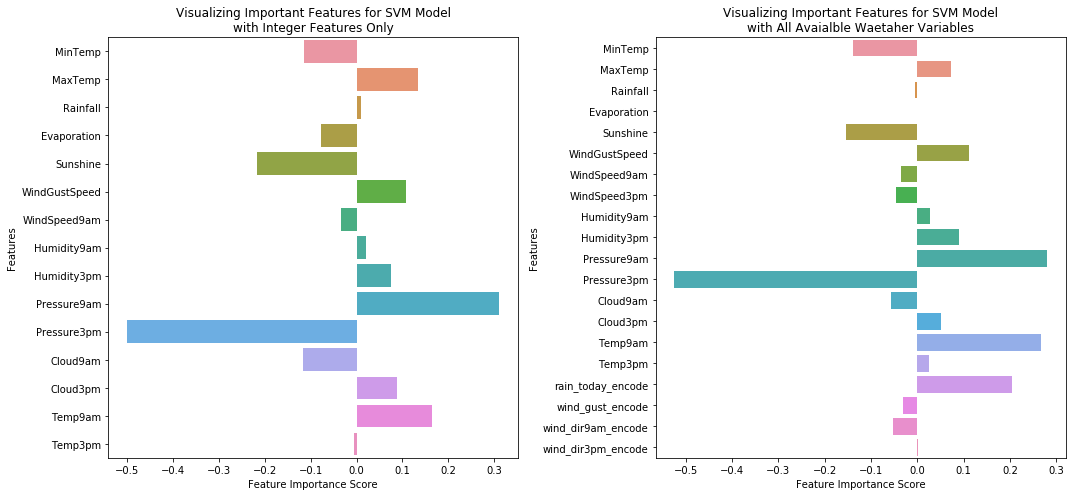

In [74]:
import seaborn as sns

plt.figure(figsize = (15,7))
plt.subplot(121)
sns.barplot(x=importance_SVM, y=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',
         'Humidity9am','Humidity3pm','Pressure9am', 'Pressure3pm',
         'Cloud9am','Cloud3pm', 'Temp9am','Temp3pm'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for SVM Model\nwith Integer Features Only")

plt.subplot(122)
sns.barplot(x=importance_SVM_all, y=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
                        'Sunshine', 'WindGustSpeed','WindSpeed9am',
                        'WindSpeed3pm', 'Humidity9am','Humidity3pm', 'Pressure9am', 'Pressure3pm',
                        'Cloud9am','Cloud3pm', 'Temp9am', 'Temp3pm','rain_today_encode', 
                        'wind_gust_encode','wind_dir9am_encode', 'wind_dir3pm_encode'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features for SVM Model\nwith All Avaialble Waetaher Variables")

plt.tight_layout()
plt.show()

From both figures it canbe concluded that the score is same for both feature list used. The added encode features (the added features for integer only) has relatively small contribution to the model. That is why when the model is run with this added features the accuracy drop. However, the raintoday features still can be considered. From those figure at least we can consider these listed features:
* Min. Temperature
*  Max. Temperature
* Sunshine
* Wind Gust Speed
* Humidity 3pm
* Pressure 3 pm
* Cloud 3pm
* Temperature 9am
* Rain today encode 

In [75]:
Darwin.columns.values

array(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am',
       'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow',
       'target_label_encode', 'rain_today_encode', 'wind_gust_encode',
       'wind_dir9am_encode', 'wind_dir3pm_encode'], dtype=object)

In [76]:
np.shape(Darwin)

(3062, 27)

In [77]:
Darwin.drop(['WindGustDir', 'WindDir9am', 
             'WindDir3pm','RainToday','RainTomorrow'], axis=1)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,target_label_encode,rain_today_encode,wind_gust_encode,wind_dir9am_encode,wind_dir3pm_encode
Datetime,,,,,,,,,,,,,,,,,,,,,
2008-07-01,Darwin,20.0,33.1,0.0,4.4,11.0,41.0,13.0,17.0,81.0,...,1012.1,1.0,2.0,25.4,32.3,0,0,0,1,10
2008-07-02,Darwin,19.4,32.4,0.0,6.0,10.4,50.0,15.0,28.0,81.0,...,1012.4,1.0,1.0,24.3,31.9,0,0,1,9,0
2008-07-03,Darwin,18.2,31.8,0.0,8.0,11.0,46.0,22.0,19.0,38.0,...,1013.0,0.0,1.0,24.3,31.2,0,0,0,2,1
2008-07-04,Darwin,17.3,30.7,0.0,7.0,10.4,44.0,22.0,13.0,55.0,...,1013.6,2.0,6.0,21.3,29.8,0,0,0,9,0
2008-07-05,Darwin,15.5,30.8,0.0,7.0,10.8,46.0,20.0,19.0,37.0,...,1012.6,1.0,1.0,22.2,29.6,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-20,Darwin,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,...,1010.5,0.0,1.0,24.5,32.3,0,0,1,9,4
2017-06-21,Darwin,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,...,1011.2,7.0,0.0,24.8,32.0,0,0,0,9,9
2017-06-22,Darwin,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,...,1011.8,0.0,0.0,24.8,32.1,0,0,0,0,13


In [78]:
#Reorder the column --> to make teh target in the last column 
#so it can be easier to see the correlation diagram
Darwin=Darwin[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am',
       'Cloud3pm', 'Temp9am', 'Temp3pm','rain_today_encode', 'wind_gust_encode',
       'wind_dir9am_encode', 'wind_dir3pm_encode','target_label_encode']]
Darwin.columns.values

array(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
       'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
       'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'rain_today_encode',
       'wind_gust_encode', 'wind_dir9am_encode', 'wind_dir3pm_encode',
       'target_label_encode'], dtype=object)

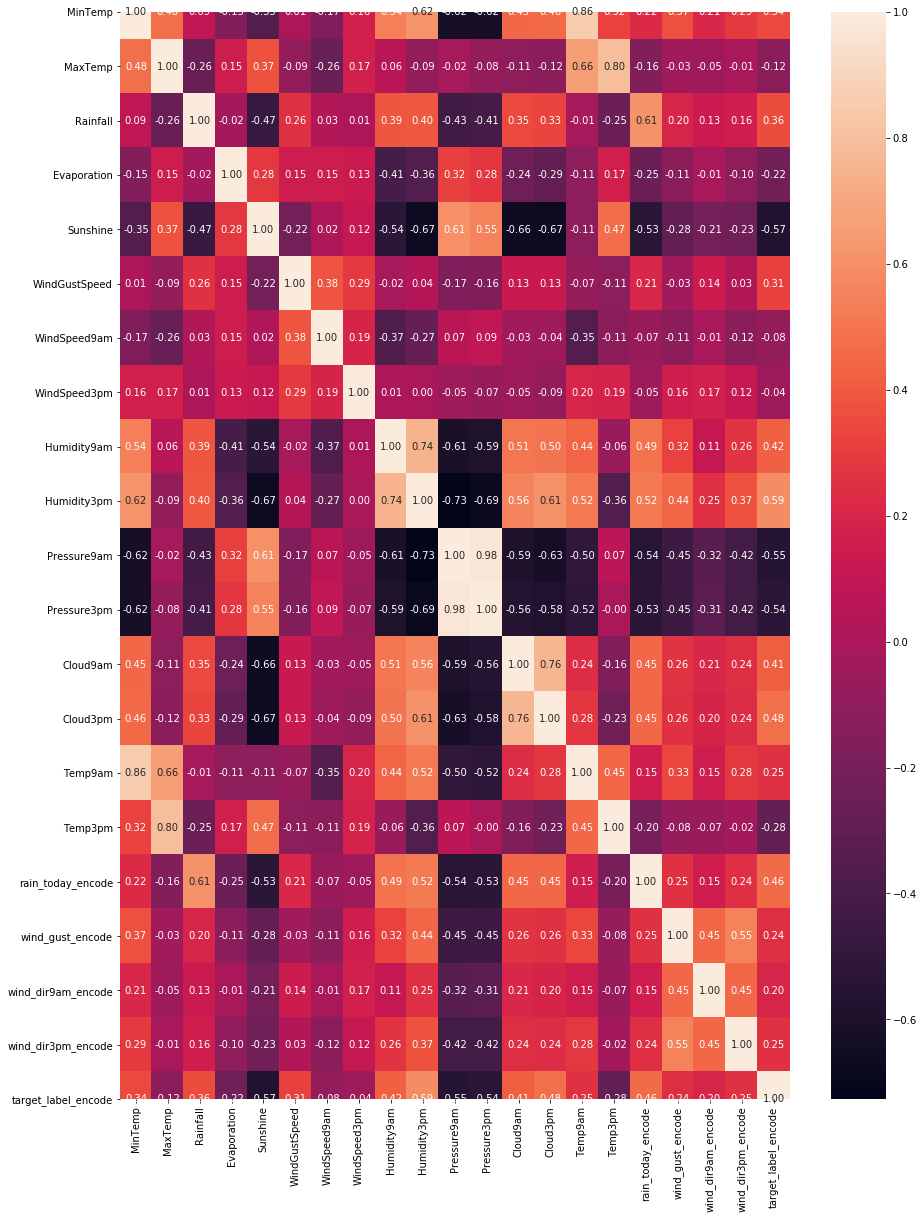

In [79]:
from pylab import rcParams

def plot_correlation(data):
    '''
    plot correlation's matrix to explore dependency between features 
    '''
    # init figure size
    rcParams['figure.figsize'] = 15, 20
    fig = plt.figure()
    sns.heatmap(data.corr(), annot=True, fmt=".2f")
    plt.show()
    fig.savefig('corr.png')

# plot correlation & densities
plot_correlation(Darwin)

From correlation plot above, it can be known that the higher number, the more important  the features (focus on the last bar which related to the target). Between features: we can drop one of the higer correlations as one feature with similar higher correlation already represent the target. For the same variables we can chose the higher one and we drop the low correlation (r<0.25). Though correlation of rainfall is 0.36, I consider the feature importance's result from SVM model (see the panel figure Feature Importance) in which rainfall is relatively not important for the model, so here the filtered features so far:
* Min. Temperature (r = 0.34)
* Sunshine (r = 0.57)
* Wind Gust Speed (r = 0.31)
* Humidity 3 pm (r = 0.59)
* Pressure 3 pm (r = 0.54) --> with human judgement as pressure in the afternoon will determine tomorrow's condition
* Cloud 3 pm (r = 0.48)
* Temp. 3 pm (r = 0.28)
* Rain Today Encode (r = 0.46)

In [80]:
np.shape(Darwin)

(3062, 22)

In [81]:
Darwin_new = Darwin[['MinTemp','Sunshine', 'WindGustSpeed',
                    'Humidity3pm', 'Pressure3pm','Cloud3pm',
                    'Temp3pm', 'rain_today_encode','target_label_encode']]

In [82]:
Darwin_new

,MinTemp,Sunshine,WindGustSpeed,Humidity3pm,Pressure3pm,Cloud3pm,Temp3pm,rain_today_encode,target_label_encode
Datetime,,,,,,,,,
2008-07-01,20.0,11.0,41.0,32.0,1012.1,2.0,32.3,0,0
2008-07-02,19.4,10.4,50.0,17.0,1012.4,1.0,31.9,0,0
2008-07-03,18.2,11.0,46.0,24.0,1013.0,1.0,31.2,0,0
2008-07-04,17.3,10.4,44.0,16.0,1013.6,6.0,29.8,0,0
2008-07-05,15.5,10.8,46.0,16.0,1012.6,1.0,29.6,0,0
...,...,...,...,...,...,...,...,...,...
2017-06-20,19.3,11.0,35.0,32.0,1010.5,1.0,32.3,0,0
2017-06-21,21.2,8.6,37.0,28.0,1011.2,0.0,32.0,0,0
2017-06-22,20.7,11.0,33.0,23.0,1011.8,0.0,32.1,0,0


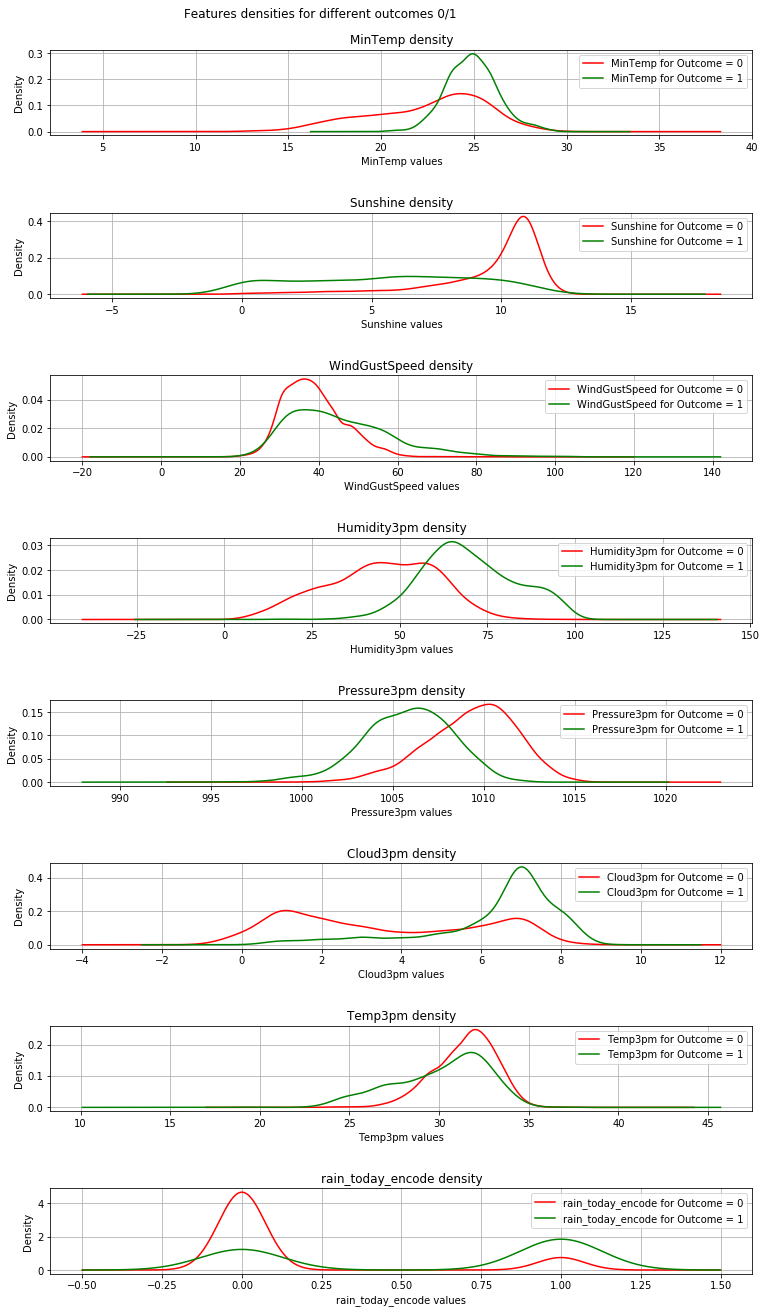

In [83]:
def plot_densities(Darwin_new):
    '''
    Plot features densities depending on the outcome values
    '''
    # change fig size to fit all subplots beautifully 
    rcParams['figure.figsize'] = 15, 20

    # separate data based on outcome values 
    outcome_0 = Darwin_new[Darwin_new['target_label_encode'] == 0]
    outcome_1 = Darwin_new[Darwin_new['target_label_encode'] == 1]

    # init figure
    fig, axs = plt.subplots(8, 1)
    fig.suptitle('Features densities for different outcomes 0/1')
    plt.subplots_adjust(left = 0.25, right = 0.9, bottom = 0.1, top = 0.95,
                        wspace = 0.2, hspace = 0.9)

    # plot densities for outcomes
    for column_name in names[:-1]: 
        ax = axs[names.index(column_name)]
        #plt.subplot(4, 2, names.index(column_name) + 1)
        outcome_0[column_name].plot(kind='density', ax=ax, subplots=True, 
                                    sharex=False, color="red", legend=True,
                                    label=column_name + ' for Outcome = 0')
        outcome_1[column_name].plot(kind='density', ax=ax, subplots=True, 
                                     sharex=False, color="green", legend=True,
                                     label=column_name + ' for Outcome = 1')
        ax.set_xlabel(column_name + ' values')
        ax.set_title(column_name + ' density')
        ax.grid('on')
    plt.show()
    fig.savefig('densities.png')

# load your data 
names = list(Darwin_new.columns)

# plot correlation & densities
plot_densities(Darwin_new)

In those above plots, it simply give us information if the green and red line are overlapping (has same pattern with almost same number of density), meaning that the features do not separate the target, so we can drop them out. Here simply analysis for those lines which is not overlapping. 
* Min. temperature --> has different density with wider distribution for No Target (refelcets the low correlation)
* Sunshine --> Sunshine has different curve in which for Yes Target it is wider
* Wind Gust Speed --> has different desnity for Yes and No Target in which Yes target much wider
* Humidity at 3 pm --> much clearer on the curve (agree with the correlation values)
* Pressure at 3 pm --> you can see some separation (the slight horizontal shift between both curves)

## Feature Selection Conclusion

To avoid overfitting of our model in the firt part of model development, we can choose three features for weather prediction in Darwin: **Min. temperature , Sunshine, Humidity at 3 pm and Pressure at 3 pm.** 

# New Feature Machine Learning Model Development

In [84]:
new_features = Darwin[['MinTemp','Sunshine', 'WindGustSpeed',
                    'Humidity3pm', 'Pressure3pm']].values
target_data = Darwin[['target_label_encode']].values.reshape(-1,1)

In [85]:
x_train_new,x_test_new,y_train_new,y_test_new = train_test_split(new_features,target_data,test_size=0.25)
y_test_new = y_test_new.reshape(len(y_test_new))
y_train_new = y_train_new.reshape(len(y_train_new))
print('shape feature after selection: ',new_features.shape)
print('shape feature train after selection: ',x_train_new.shape)
print('shape feature test after selection: ',x_test_new.shape)
print('shape target test after selection: ',y_test_new.shape)

shape feature after selection:  (3062, 5)
shape feature train after selection:  (2296, 5)
shape feature test after selection:  (766, 5)
shape target test after selection:  (766,)


#### KNN

In [86]:
mod_KNN_new = KNeighborsClassifier(n_neighbors=5)
mod_KNN_new.fit(x_train_new,y_train_new)
y_pred_KNN_new = mod_KNN_new.predict(x_test_new)
print("Accuracy Model KNN New Feature:",metrics.accuracy_score(y_test_new,y_pred_KNN_new))

Accuracy Model KNN New Feature: 0.8720626631853786


In [87]:
cm_KNN_new = confusion_matrix(y_test_new,y_pred_KNN_new)
cm_KNN_new

array([[532,  40],
       [ 58, 136]])

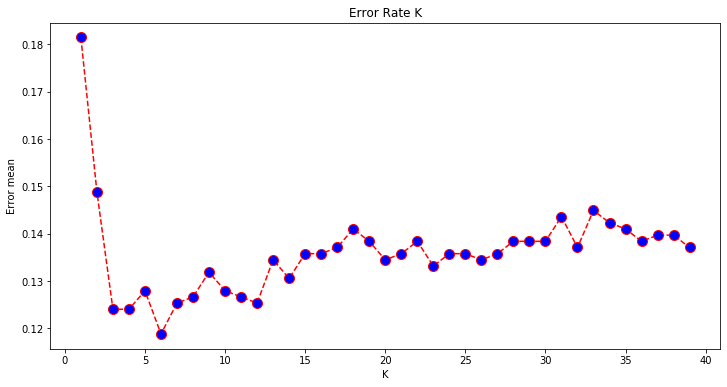

In [88]:
#Find the optimum K

error = []

#Calculating error for K value between 1 and 40
for i in range (1,40):
    mod_KNN_new = KNeighborsClassifier(n_neighbors=i)
    mod_KNN_new.fit(x_train_new,y_train_new)
    y_pred_KNN_new_i = mod_KNN_new.predict(x_test_new)
    error.append(np.mean(y_pred_KNN_new_i != y_test_new))

plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',
        marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K')
plt.xlabel ('K')
plt.ylabel('Error mean')
plt.show()

In [89]:
mod_KNN_new = KNeighborsClassifier(n_neighbors=11)
mod_KNN_new.fit(x_train_new,y_train_new)
y_pred_KNN_new = mod_KNN_new.predict(x_test_new)
print("Accuracy Model KNN New Feature:",metrics.accuracy_score(y_test_new,y_pred_KNN_new))

Accuracy Model KNN New Feature: 0.8733681462140992


In [90]:
cm_KNN_new = confusion_matrix(y_test_new,y_pred_KNN_new)
cm_KNN_new

array([[536,  36],
       [ 61, 133]])

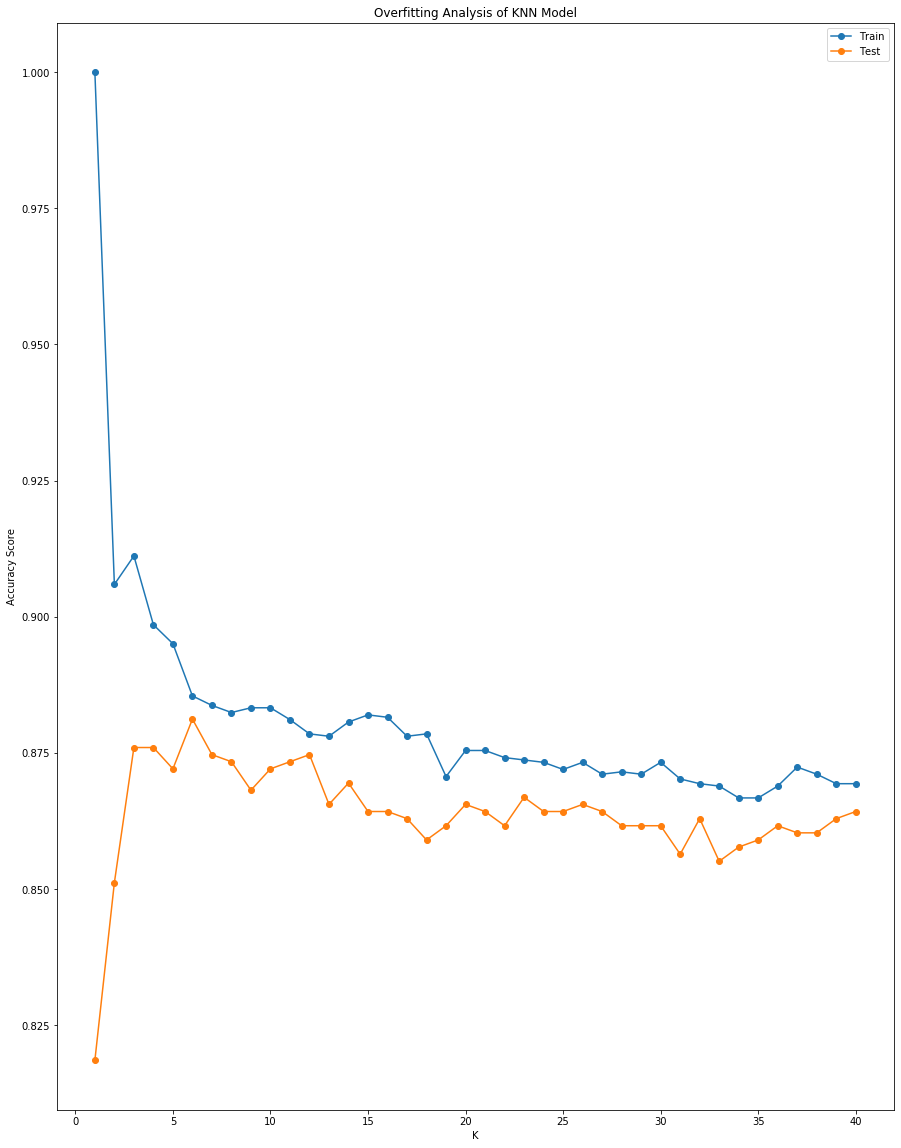

In [91]:
## Overfitting Analysis (
## Overfittiing occured when train accuracy is higher than the test accuracy)
from sklearn.metrics import accuracy_score

# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 41)]
# evaluate a decision tree for each depth
for i in values:
	# configure the model
	KNN_new = KNeighborsClassifier(n_neighbors=i)
	# fit model on the training dataset
	KNN_new.fit(x_train_new,y_train_new)
	# evaluate on the train dataset
	train_yhat = KNN_new.predict(x_train_new)
	train_acc = accuracy_score(y_train_new, train_yhat)
	train_scores.append(train_acc)
	# evaluate on the test dataset
	test_yhat = KNN_new.predict(x_test_new)
	test_acc = accuracy_score(y_test_new, test_yhat)
	test_scores.append(test_acc)
	# summarize progress
	#print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
plt.plot(values, train_scores, '-o', label='Train')
plt.plot(values, test_scores, '-o', label='Test')
plt.title('Overfitting Analysis of KNN Model')
plt.xlabel ('K')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

### Logistic Regression

In [92]:
mod_log_new = LogisticRegression(solver='liblinear',C=0.05,multi_class='ovr',
                            random_state=0)
mod_log_new.fit(x_train_new,y_train_new)
y_pred_log_new = mod_log_new.predict(x_test_new)
mod_log_new.score(x_train_new,y_train_new)
print("Accuracy model Logistic Regression All:",
      metrics.accuracy_score(y_test_new,y_pred_log_new))

Accuracy model Logistic Regression All: 0.8668407310704961


In [93]:
print(classification_report(y_test_new,y_pred_log_new))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91       572
           1       0.78      0.66      0.72       194

    accuracy                           0.87       766
   macro avg       0.84      0.80      0.81       766
weighted avg       0.86      0.87      0.86       766



In [94]:
cm_log_new = confusion_matrix(y_test_new,y_pred_log_new)
cm_log_new

array([[536,  36],
       [ 66, 128]])

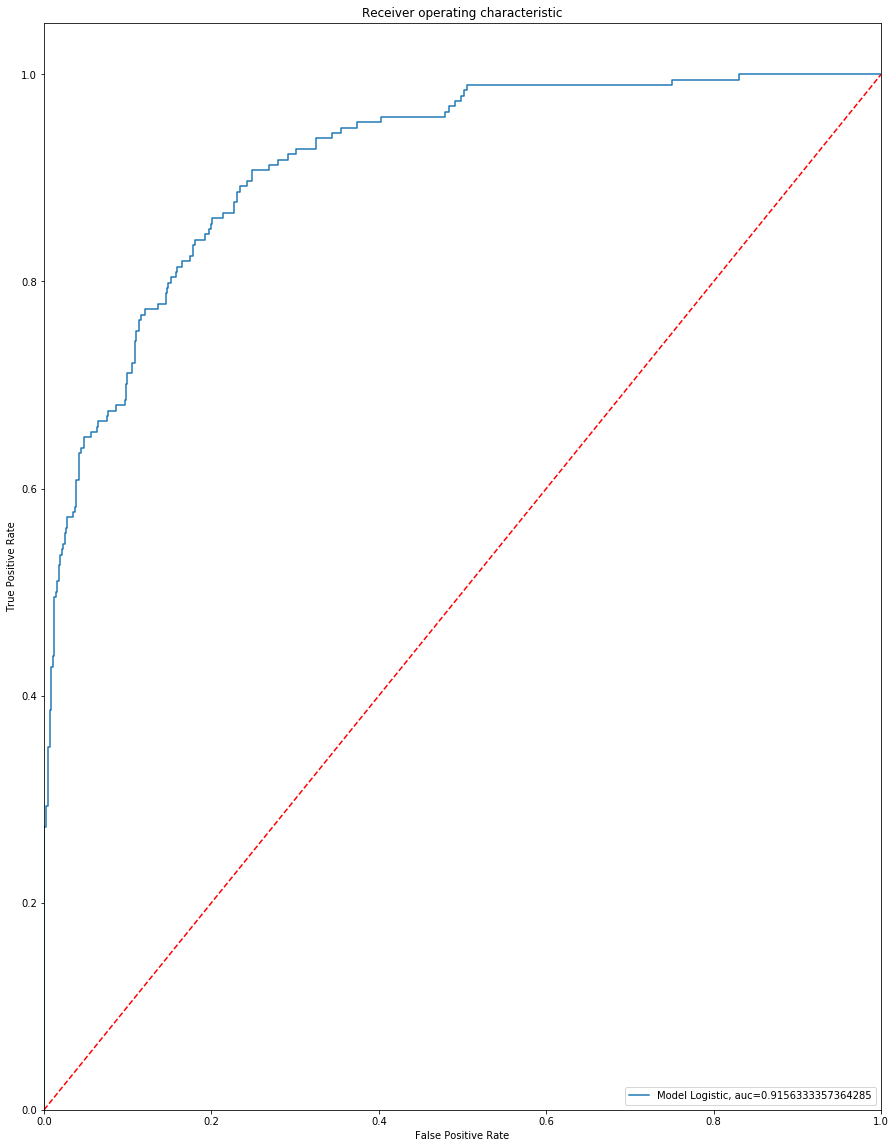

In [95]:
y_pred_log_proba = mod_log_new.predict_proba(x_test_new)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_new,  y_pred_log_proba)
auc = metrics.roc_auc_score(y_test_new, y_pred_log_proba)
plt.plot(fpr,tpr,label="Model Logistic, auc="+str(auc))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Naive Bayes

In [96]:
mod_bay_new = GaussianNB().fit(x_train_new,y_train_new)
y_pred_bay_new = mod_bay_new.predict(x_test_new)
mod_bay_new.score(x_train_new,y_train_new)
print("Accuracy model Naive Bayes:",metrics.accuracy_score(y_test_new,y_pred_bay_new))

Accuracy model Naive Bayes: 0.860313315926893


In [97]:
cm_bay_new = confusion_matrix(y_test_new,y_pred_bay_new)
cm_bay_new

array([[509,  63],
       [ 44, 150]])

### Decision Tree

In [98]:
clf_new = DecisionTreeClassifier()
mod_clf_new = clf_new.fit(x_train_new,y_train_new)
y_pred_clf_new = clf_new.predict(x_test_new)
print("Accuracy Decision Tree:",metrics.accuracy_score(y_test_new,y_pred_clf_new))

Accuracy Decision Tree: 0.7911227154046997


In [99]:
cm_clf_new = confusion_matrix(y_test_new,y_pred_clf_new)
cm_clf_new

array([[490,  82],
       [ 78, 116]])

### Random Forest

In [100]:
rfs_new = RandomForestClassifier(n_estimators=100)
mod_rfs_new = rfs_new.fit(x_train_new,y_train_new)
y_pred_rfs_new = rfs_new.predict(x_test_new)
print("Accuracy Random Forest:",metrics.accuracy_score(y_test_new,y_pred_rfs_new))

Accuracy Random Forest: 0.8668407310704961


In [101]:
cm_rfs_new = confusion_matrix(y_test_new,y_pred_rfs_new)
cm_rfs_new

array([[530,  42],
       [ 60, 134]])

### SVM

In [102]:
sup_new = svm.SVC(kernel='linear')
mod_sup_new = sup_new.fit(x_train_new,y_train_new)
y_pred_sup_new = sup_new.predict(x_test_new)
print("Accuracy SVM:",metrics.accuracy_score(y_test_new,y_pred_sup_new))

Accuracy SVM: 0.8681462140992167


In [103]:
cm_sup_new = confusion_matrix(y_test_new,y_pred_sup_new)
cm_sup_new

array([[537,  35],
       [ 66, 128]])

## Summary - Model Selection

### Accuracy Score with Integer Features Only

In [104]:
print("Accuracy Model KNN:",metrics.accuracy_score(y_test,y_pred_KNN))
print("Accuracy model Logistic Regression:",metrics.accuracy_score(y_test,y_pred_log))
print("Accuracy model Naive Bayes:",metrics.accuracy_score(y_test,y_pred_bay))
print("Accuracy model Decision Tree:",metrics.accuracy_score(y_test,y_pred_clf))
print("Accuracy model Random Forest:",metrics.accuracy_score(y_test,y_pred_rfs))
print("Accuracy model SVM:",metrics.accuracy_score(y_test,y_pred_sup))

Accuracy Model KNN: 0.8785900783289817
Accuracy model Logistic Regression: 0.8642297650130548
Accuracy model Naive Bayes: 0.8172323759791122
Accuracy model Decision Tree: 0.8002610966057441
Accuracy model Random Forest: 0.8590078328981723
Accuracy model SVM: 0.8590078328981723


## Accuracy Score with Features Selection

In [105]:
print("Accuracy Model KNN:",metrics.accuracy_score(y_test_new,y_pred_KNN_new))
print("Accuracy model Logistic Regression:",metrics.accuracy_score(y_test_new,y_pred_log_new))
print("Accuracy model Naive Bayes:",metrics.accuracy_score(y_test_new,y_pred_bay_new))
print("Accuracy model Decision Tree:",metrics.accuracy_score(y_test_new,y_pred_clf_new))
print("Accuracy model Random Forest:",metrics.accuracy_score(y_test_new,y_pred_rfs_new))
print("Accuracy model SVM:",metrics.accuracy_score(y_test_new,y_pred_sup_new))

Accuracy Model KNN: 0.8733681462140992
Accuracy model Logistic Regression: 0.8668407310704961
Accuracy model Naive Bayes: 0.860313315926893
Accuracy model Decision Tree: 0.7911227154046997
Accuracy model Random Forest: 0.8668407310704961
Accuracy model SVM: 0.8681462140992167


After comparing the accuracy of those model performances with different features number and selection method consideration, it can be concluded that **the best model** for **weather prediction in Darwin** is **KNN (K-Number = 11)** with selected features of **Min. temperature , Sunshine, Humidity at 3 pm and Pressure at 3 pm.** 

Thus, this model will be used in the model Deployment~

However, we need to test whether this model is work or not. 

In [106]:
x_test_new

array([[  16.3,   11.2,   52. ,   18. , 1012.5],
       [  18.9,   11.4,   57. ,   12. , 1011.4],
       [  24.5,    9.2,   35. ,   60. , 1010.6],
       ...,
       [  19.5,   10.9,   39. ,   29. , 1011.5],
       [  16.2,   11.2,   37. ,   35. , 1011.4],
       [  25.7,    8.9,   37. ,   56. , 1010.2]])

In [107]:
np.shape(x_test_new)

(766, 5)

In [108]:
coba_tebak_cuaca_Darwin=np.array([19,12,10,65,1015]).reshape(-1,1).transpose()
#Min. Temp., Shunshine, Gustwind, RH3pm, Pressure3pm
#np.shape(coba_tebak_cuaca)
Hasil=mod_KNN_new.predict(coba_tebak_cuaca_Darwin)
Hasil

array([0])

# Model Deployment

In [109]:
import pickle

pickle.dump(mod_KNN_new,open('darwin_model_clssifier.pkl','wb'))

In [110]:
from flask import Flask